# Deep Learning Project1

## Introduction

**DOMAIN**: Electronics and Telecommunication

**CONTEXT**: A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.

**DATA DESCRIPTION**: The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization, Activation, LeakyReLU
from keras.utils import to_categorical
from keras import optimizers
import random
from tensorflow.keras import backend


## Load the dataset

In [2]:
data_df = pd.read_csv('Signal.csv')

In [3]:
data_df.shape

(1599, 12)

In [4]:
data_df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Data Preparation and Analysis

Check for missing values

In [6]:
data_df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

Check for presence of duplicate records in the dataset and impute them.

In [7]:
data_df.duplicated().sum()

240

In [8]:
data_df[data_df.duplicated()]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [9]:
data_df = data_df.drop_duplicates()

In [10]:
data_df.shape

(1359, 12)

Visualise distribution of the target variable

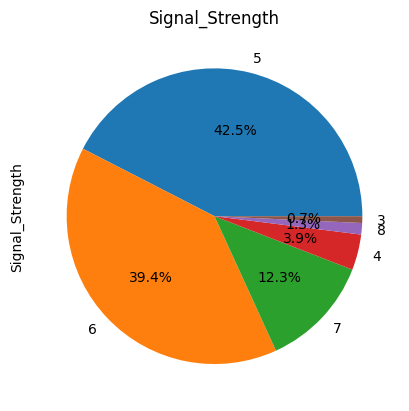

In [11]:
data_df['Signal_Strength'].value_counts().plot.pie(autopct='%1.1f%%');
plt.title('Signal_Strength')
plt.show()

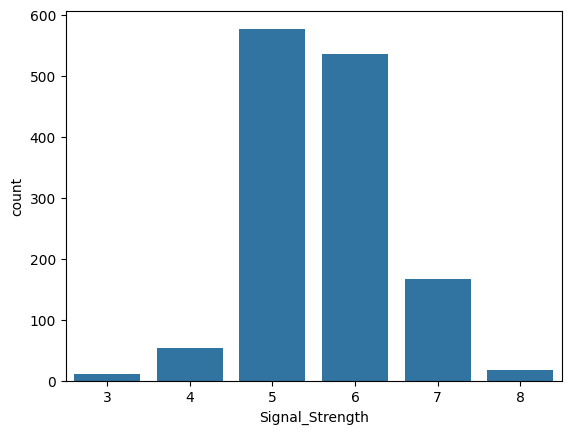

In [12]:
sns.countplot(data=data_df, x='Signal_Strength');

The target (Signal Strength) has 6 possible values and majority of the data from the dataset have the target value as '5' or '6'. So, we have an imbalanced dataset.

The paramters widely vary in values. Parameter 5 varies from 0.01 to 0.6 while parameter 6 has values raning from 1 to 72 and paramter 7 from 6 to 289.

Parameter 8 has a very small standard deviation. It ranges between values 0.99 and 1.003 and hence it might not have much impact on the target Signal Strength.

Split the data into train & test with 70:30 proportion

In [13]:
X = data_df.drop(columns='Signal_Strength')
y = data_df['Signal_Strength']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Print shape of all the 4 variables and verify if train and test data is in sync

In [15]:
print('Shape of X_train: ' + str(X_train.shape))
print('Shape of X_test: ' + str(X_test.shape))
print('Shape of y_train: ' + str(y_train.shape))
print('Shape of y_test: ' + str(y_test.shape))

Shape of X_train: (951, 11)
Shape of X_test: (408, 11)
Shape of y_train: (951,)
Shape of y_test: (408,)


Normalise the train and test data with appropriate method.

In [16]:
# Normalize training and test data
X_train_std = StandardScaler().fit_transform(X_train)

X_test_std = StandardScaler().fit_transform(X_test)

In [17]:
X_train_df = pd.DataFrame(X_train_std, columns = X_train.columns)
X_test_df = pd.DataFrame(X_test_std, columns = X_test.columns)

In [18]:
X_train_df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,-0.530385,0.773313,-0.789286,-0.704591,2.025004,-1.029508,-0.783619,-0.386838,0.546820,-0.723128,-0.865796
1,-1.382596,-0.705054,-0.738098,-0.099326,-0.655015,-0.177532,-0.565631,-1.667424,2.074549,0.090712,1.827137
2,-1.837109,-0.301863,-1.301159,-0.931565,-1.108556,0.201124,-0.067374,-2.485276,3.934394,-0.222303,2.198577
3,0.037757,-0.839451,1.309394,-0.553275,6.704729,-0.650852,-0.627913,0.635478,-1.645140,2.532230,-1.237235
4,-0.757641,0.504519,-0.891660,-0.855907,-0.345782,1.053099,0.524306,-0.386838,-0.183833,-0.284906,-1.144376


In [19]:
X_test_df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,0.978839,-1.067451,1.441494,-0.285371,-0.525380,-1.076553,-0.950301,0.219187,-0.332081,0.640452,0.153572
1,-0.034025,1.982728,-0.347532,-0.778576,-0.057356,-0.879653,-0.480267,-1.103249,-1.242625,-1.066068,-0.395519
2,1.217160,-1.523552,-0.143072,-0.285371,-0.330370,-0.092055,-0.424969,-0.574274,-0.574893,-0.031813,2.166904
3,0.800098,-1.238489,1.032574,-0.778576,-0.642386,-0.682754,-0.673810,0.139841,-0.574893,0.795590,-0.120973
4,-0.808568,0.015790,-1.165373,0.348749,-0.232865,-0.879653,-0.590863,1.065547,2.278146,1.261005,-0.944609


Transform Labels into format acceptable by Neural Network

In [20]:
y_train = pd.get_dummies(y_train, columns = ['Signal_Strength'])
y_test = pd.get_dummies(y_test, columns = ['Signal_Strength'])

In [21]:
y_train[:10]

,3,4,5,6,7,8
303,0,0,1,0,0,0
1292,0,0,0,1,0,0
695,0,0,0,1,0,0
451,0,0,0,1,0,0
1309,0,0,1,0,0,0
1239,0,1,0,0,0,0
57,0,0,1,0,0,0
882,0,0,0,1,0,0
397,0,0,0,1,0,0
1051,0,0,1,0,0,0


## Model training and evaluation

In [22]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [23]:
model = Sequential()
model.add(Dense(11, input_dim = X_train_df.shape[1], kernel_initializer='he_normal', activation = 'relu'))

model.add(Dense(y_train.shape[1], kernel_initializer='he_normal', activation = 'softmax'))


In [24]:
sgd = optimizers.SGD(lr = 0.001)

In [25]:
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 6)                 72        
                                                                 
Total params: 204 (816.00 Byte)
Trainable params: 204 (816.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the classifier using previously designed Architecture

In [26]:
history=model.fit(X_train_df, y_train,
          validation_split=0.2,
          epochs=400,
          batch_size=200,verbose=1)

Epoch 1/400
4/4 [==============================] - 3s 312ms/step - loss: 2.5881 - accuracy: 0.1789 - val_loss: 2.4307 - val_accuracy: 0.2042
Epoch 2/400
4/4 [==============================] - 0s 43ms/step - loss: 2.5183 - accuracy: 0.1921 - val_loss: 2.3693 - val_accuracy: 0.2199
Epoch 3/400
4/4 [==============================] - 0s 43ms/step - loss: 2.4527 - accuracy: 0.2013 - val_loss: 2.3117 - val_accuracy: 0.2199
Epoch 4/400
4/4 [==============================] - 0s 66ms/step - loss: 2.3910 - accuracy: 0.2092 - val_loss: 2.2581 - val_accuracy: 0.2565
Epoch 5/400
4/4 [==============================] - 0s 23ms/step - loss: 2.3334 - accuracy: 0.2197 - val_loss: 2.2076 - val_accuracy: 0.2565
Epoch 6/400
4/4 [==============================] - 0s 45ms/step - loss: 2.2786 - accuracy: 0.2289 - val_loss: 2.1603 - val_accuracy: 0.2618
Epoch 7/400
4/4 [==============================] - 0s 27ms/step - loss: 2.2271 - accuracy: 0.2447 - val_loss: 2.1157 - val_accuracy: 0.2723
Epoch 8/400
4/4 [==

Plot Training Loss and Validation Loss

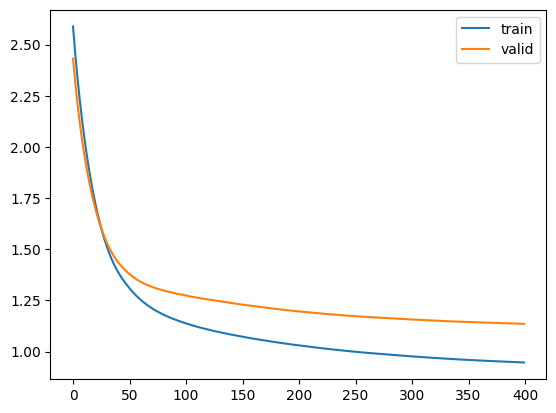

In [27]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


Plot Training Accuracy and Validation Accuracy

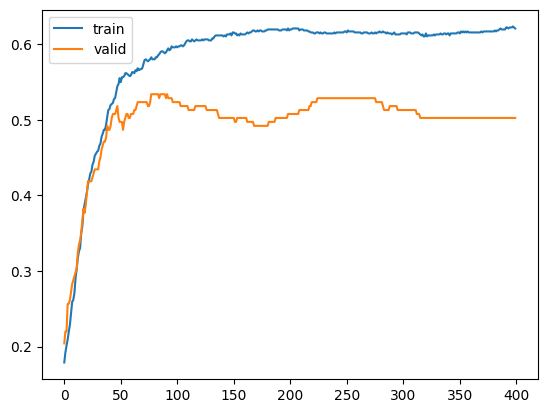

In [28]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)


In [29]:
#Printing results
results = model.evaluate(X_test_df, y_test)
results

13/13 [==============================] - 0s 3ms/step - loss: 1.0983 - accuracy: 0.5466


[1.0982617139816284, 0.5465686321258545]

In [30]:
y_pred = model.predict(X_test_df)
y_pred

13/13 [==============================] - 0s 3ms/step


array([[8.9163415e-04, 1.2996237e-02, 1.9928926e-01, 4.8031369e-01,
        2.8580540e-01, 2.0703603e-02],
       [1.5296123e-02, 2.0574961e-02, 8.1512052e-01, 1.3553073e-01,
        7.8642312e-03, 5.6135310e-03],
       [8.3680841e-04, 4.0514278e-03, 4.4211123e-02, 4.5392039e-01,
        3.9763314e-01, 9.9347107e-02],
       ...,
       [4.4855423e-04, 2.0575870e-03, 9.7757339e-01, 1.9221686e-02,
        5.4120080e-04, 1.5751066e-04],
       [4.7707497e-03, 1.1857077e-02, 6.3398063e-01, 3.3236745e-01,
        7.3402231e-03, 9.6838381e-03],
       [4.7734663e-02, 4.6916947e-02, 2.9782519e-01, 4.9362519e-01,
        6.1112110e-02, 5.2785959e-02]], dtype=float32)

Design new architecture to improve the performance of the model.

In [31]:
model2 = Sequential()
model2.add(Dense(11, input_dim = X_train_df.shape[1], kernel_initializer='he_uniform', activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(y_train.shape[1], kernel_initializer='he_uniform', activation = 'softmax'))


In [32]:
optrms = optimizers.RMSprop(lr = 0.001)

In [33]:
model2.compile(optimizer=optrms, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dropout (Dropout)           (None, 11)                0         
                                                                 
 batch_normalization (Batch  (None, 11)                44        
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 6)                 72        
                                                                 
Total params: 248 (992.00 Byte)
Trainable params: 226 (904.00 Byte)
Non-trainable params: 22 (88.00 Byte)
_________________________________________________________________


In [34]:
history2=model2.fit(X_train_df, y_train,
          validation_split=0.2,
          epochs=400,
          batch_size=200,verbose=1)

Epoch 1/400
4/4 [==============================] - 1s 91ms/step - loss: 2.1831 - accuracy: 0.2526 - val_loss: 2.6938 - val_accuracy: 0.0628
Epoch 2/400
4/4 [==============================] - 0s 13ms/step - loss: 2.1626 - accuracy: 0.2724 - val_loss: 2.5961 - val_accuracy: 0.0838
Epoch 3/400
4/4 [==============================] - 0s 17ms/step - loss: 2.0731 - accuracy: 0.2816 - val_loss: 2.5151 - val_accuracy: 0.0942
Epoch 4/400
4/4 [==============================] - 0s 12ms/step - loss: 2.0426 - accuracy: 0.2842 - val_loss: 2.4424 - val_accuracy: 0.1152
Epoch 5/400
4/4 [==============================] - 0s 12ms/step - loss: 2.0058 - accuracy: 0.2921 - val_loss: 2.3800 - val_accuracy: 0.1623
Epoch 6/400
4/4 [==============================] - 0s 19ms/step - loss: 1.9754 - accuracy: 0.3289 - val_loss: 2.3220 - val_accuracy: 0.1990
Epoch 7/400
4/4 [==============================] - 0s 13ms/step - loss: 1.9649 - accuracy: 0.3342 - val_loss: 2.2693 - val_accuracy: 0.2147
Epoch 8/400
4/4 [===

Plot Training Loss and Validation Loss

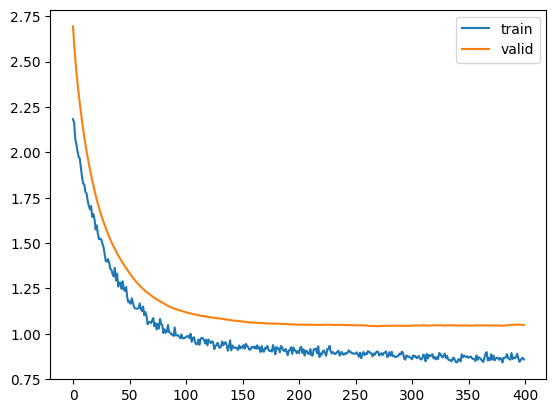

In [35]:
# Capturing learning history per epoch
hist2  = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch

# Plotting accuracy at different epochs
plt.plot(hist2['loss'])
plt.plot(hist2['val_loss'])
plt.legend(("train" , "valid") , loc =0)


Plot Training Accuracy and Validation Accuracy

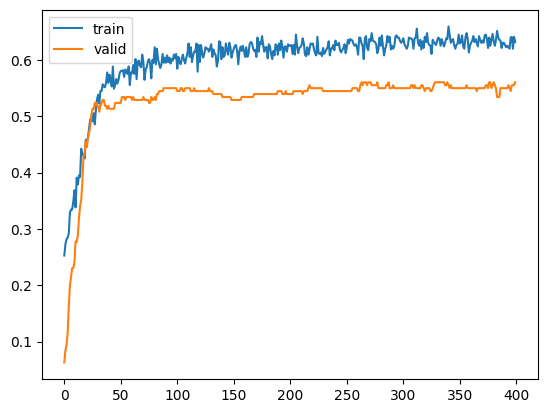

In [36]:
# Capturing learning history per epoch
hist2  = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch

# Plotting accuracy at different epochs
plt.plot(hist2['accuracy'])
plt.plot(hist2['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)


In [37]:
#Printing results
results2 = model2.evaluate(X_test_df, y_test)
results2

13/13 [==============================] - 0s 2ms/step - loss: 1.0726 - accuracy: 0.5637


[1.072596549987793, 0.563725471496582]

In [38]:
model3 = Sequential()
model3.add(Dense(11, input_dim = X_train_df.shape[1], kernel_initializer='he_normal', activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dense(y_train.shape[1], kernel_initializer='he_normal', activation = 'softmax'))

In [39]:
optagrad = optimizers.Adagrad(lr = 0.001)

In [40]:
model3.compile(optimizer=optagrad, loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 batch_normalization_1 (Bat  (None, 11)                44        
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 6)                 72        
                                                                 
Total params: 248 (992.00 Byte)
Trainable params: 226 (904.00 Byte)
Non-trainable params: 22 (88.00 Byte)
_________________________________________________________________


In [41]:
history3=model3.fit(X_train_df, y_train,
          validation_split=0.2,
          epochs=400,
          batch_size=200,verbose=1)

Epoch 1/400
4/4 [==============================] - 1s 81ms/step - loss: 2.6251 - accuracy: 0.1145 - val_loss: 2.0374 - val_accuracy: 0.2932
Epoch 2/400
4/4 [==============================] - 0s 13ms/step - loss: 2.6067 - accuracy: 0.1289 - val_loss: 2.0429 - val_accuracy: 0.2827
Epoch 3/400
4/4 [==============================] - 0s 13ms/step - loss: 2.5932 - accuracy: 0.1342 - val_loss: 2.0497 - val_accuracy: 0.2723
Epoch 4/400
4/4 [==============================] - 0s 12ms/step - loss: 2.5758 - accuracy: 0.1250 - val_loss: 2.0573 - val_accuracy: 0.2670
Epoch 5/400
4/4 [==============================] - 0s 12ms/step - loss: 2.5629 - accuracy: 0.1263 - val_loss: 2.0654 - val_accuracy: 0.2670
Epoch 6/400
4/4 [==============================] - 0s 12ms/step - loss: 2.5553 - accuracy: 0.1382 - val_loss: 2.0741 - val_accuracy: 0.2723
Epoch 7/400
4/4 [==============================] - 0s 12ms/step - loss: 2.5478 - accuracy: 0.1316 - val_loss: 2.0832 - val_accuracy: 0.2670
Epoch 8/400
4/4 [===

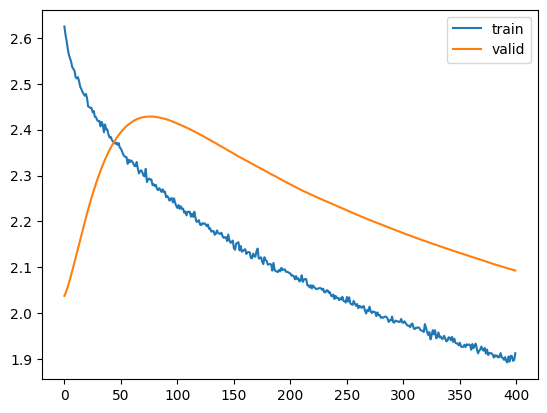

In [42]:
# Capturing learning history per epoch
hist3  = pd.DataFrame(history3.history)
hist3['epoch'] = history3.epoch

# Plotting accuracy at different epochs
plt.plot(hist3['loss'])
plt.plot(hist3['val_loss'])
plt.legend(("train" , "valid") , loc =0)


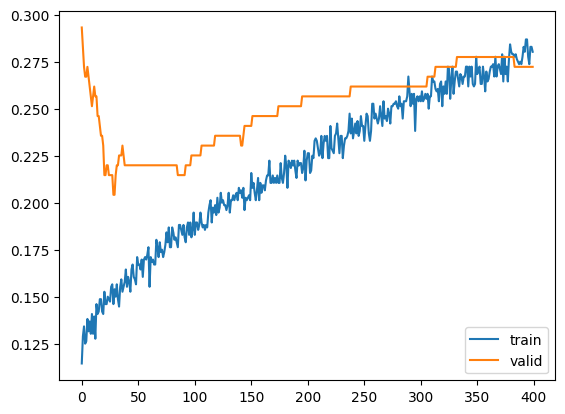

In [43]:
# Capturing learning history per epoch
hist3  = pd.DataFrame(history3.history)
hist3['epoch'] = history3.epoch

# Plotting accuracy at different epochs
plt.plot(hist3['accuracy'])
plt.plot(hist3['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)


In [44]:
results3 = model3.evaluate(X_test_df, y_test)
results3

13/13 [==============================] - 0s 2ms/step - loss: 2.0156 - accuracy: 0.2672


[2.015578269958496, 0.2671568691730499]

In [45]:
model4 = Sequential()
model4.add(Dense(11, input_dim = X_train_df.shape[1], kernel_initializer='he_normal', activation = 'relu'))
model4.add(Dense(y_train.shape[1], kernel_initializer='he_normal', activation = 'softmax'))

In [46]:
optadelta = optimizers.Adadelta(lr = 0.001)

In [47]:
model4.compile(optimizer=optadelta, loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 6)                 72        
                                                                 
Total params: 204 (816.00 Byte)
Trainable params: 204 (816.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
history4=model4.fit(X_train_df, y_train,
          validation_split=0.2,
          epochs=400,
          batch_size=200,verbose=1)

Epoch 1/400
4/4 [==============================] - 1s 68ms/step - loss: 2.6696 - accuracy: 0.0539 - val_loss: 2.7047 - val_accuracy: 0.0838
Epoch 2/400
4/4 [==============================] - 0s 12ms/step - loss: 2.6695 - accuracy: 0.0539 - val_loss: 2.7046 - val_accuracy: 0.0838
Epoch 3/400
4/4 [==============================] - 0s 12ms/step - loss: 2.6694 - accuracy: 0.0539 - val_loss: 2.7045 - val_accuracy: 0.0838
Epoch 4/400
4/4 [==============================] - 0s 13ms/step - loss: 2.6693 - accuracy: 0.0539 - val_loss: 2.7044 - val_accuracy: 0.0838
Epoch 5/400
4/4 [==============================] - 0s 11ms/step - loss: 2.6692 - accuracy: 0.0539 - val_loss: 2.7043 - val_accuracy: 0.0838
Epoch 6/400
4/4 [==============================] - 0s 13ms/step - loss: 2.6691 - accuracy: 0.0539 - val_loss: 2.7042 - val_accuracy: 0.0838
Epoch 7/400
4/4 [==============================] - 0s 12ms/step - loss: 2.6690 - accuracy: 0.0539 - val_loss: 2.7042 - val_accuracy: 0.0838
Epoch 8/400
4/4 [===

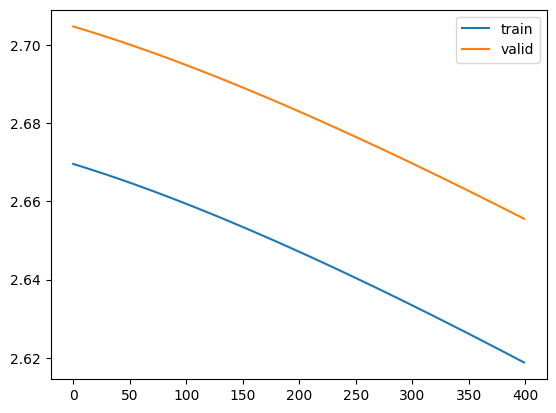

In [49]:
# Capturing learning history per epoch
hist4  = pd.DataFrame(history4.history)
hist4['epoch'] = history4.epoch

# Plotting accuracy at different epochs
plt.plot(hist4['loss'])
plt.plot(hist4['val_loss'])
plt.legend(("train" , "valid") , loc =0)


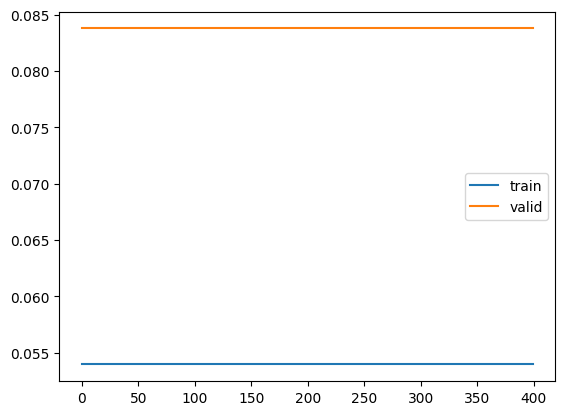

In [50]:
# Capturing learning history per epoch
hist4  = pd.DataFrame(history4.history)
hist4['epoch'] = history4.epoch

# Plotting accuracy at different epochs
plt.plot(hist4['accuracy'])
plt.plot(hist4['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)


In [51]:
results4 = model4.evaluate(X_test_df, y_test)
results4

13/13 [==============================] - 0s 2ms/step - loss: 2.5871 - accuracy: 0.0564


[2.5870752334594727, 0.05637254938483238]

In [52]:
#Compare results
print('Model 1 SGD without Dropout or Batch Normalization: \nTrain Accuracy: ', str(model.evaluate(X_train_df, y_train)),'\n Test Accuracy: ',str(model.evaluate(X_test_df, y_test)),'\n')
print('Model 2 RMSProp with Dropout and Batch Normalization: \nTrain Accuracy: ', str(model2.evaluate(X_train_df, y_train)),'\n Test Accuracy: ',str(model2.evaluate(X_test_df, y_test)),'\n')
print('Model 3 Adagrad, with Batch Normalization without Dropout: \nTrain Accuracy: ', str(model3.evaluate(X_train_df, y_train)),'\n Test Accuracy: ',str(model3.evaluate(X_test_df, y_test)),'\n')
print('Model 4 Adadelta, without Dropout or Batch Normalization: \nTrain Accuracy: ', str(model4.evaluate(X_train_df, y_train)),'\n Test Accuracy: ',str(model4.evaluate(X_test_df, y_test)),'\n')


13/13 [==============================] - 0s 3ms/step - loss: 1.0983 - accuracy: 0.5466
Model 1 SGD without Dropout or Batch Normalization: 
Train Accuracy:  [0.9845659732818604, 0.598317563533783] 
 Test Accuracy:  [1.0982617139816284, 0.5465686321258545] 

13/13 [==============================] - 0s 3ms/step - loss: 1.0726 - accuracy: 0.5637
Model 2 RMSProp with Dropout and Batch Normalization: 
Train Accuracy:  [0.8601112365722656, 0.6267087459564209] 
 Test Accuracy:  [1.072596549987793, 0.563725471496582] 

13/13 [==============================] - 0s 2ms/step - loss: 2.0156 - accuracy: 0.2672
Model 3 Adagrad, with Batch Normalization without Dropout: 
Train Accuracy:  [1.9308515787124634, 0.2744479477405548] 
 Test Accuracy:  [2.015578269958496, 0.2671568691730499] 

13/13 [==============================] - 0s 3ms/step - loss: 2.5871 - accuracy: 0.0564
Model 4 Adadelta, without Dropout or Batch Normalization: 
Train Accuracy:  [2.6261284351348877, 0.05993690714240074] 
 Test Accura

Among the models trained, the second model with RMSProp as the Optimizer with Dropout of 0.2 and Batch Normalization has given the best train and test accuracy of 63% and 56%. This model is slightly overfitting given the difference between the train and test accuracies.